In [5]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), 'src/'))

import pandas as pd
pd.set_option('display.max_rows', 500)


from oce_ecomm_abv_calculation.datasets.olist_brazilian_ecommerce import OlistBrazilianEcommerceDataset
from oce_ecomm_abv_calculation.datasets.uci_online_retail_ii import UCIOnlineRetailIIDataset

from oce_ecomm_abv_calculation.sample_statistics.vanilla import VanillaSampleStatistics
from oce_ecomm_abv_calculation.sample_statistics.oneway_bootstrap import OnewayBootstrapStatistics
from datetime import datetime


from matplotlib import pyplot as plt
import numpy as np

In [46]:
df = OlistBrazilianEcommerceDataset().standardized_customer_order_item_data_view()


In [54]:
df['r_SellingPrice'].mean()

120.37716648379588

In [61]:
# The seed of the RNG is made up of two components - the (hash of) the
# Unit ID and the index of the bootstrap sample being taken.
# Such seeding ensures the same unit in the same bootstrap sample gets the 
# same weight, while maintaining the randomness of weights overall.
# See Section 2.2.4 of https://arxiv.org/pdf/1304.7406.pdf

weights_generated = 4

df['weight_RandomizationUnit'] = (
    df['RandomizationUnitId'].apply(
        lambda ruid: np.random.default_rng(
            seed=abs(hash(ruid)) + weights_generated).poisson(lam=1.0)
    )
)
df['weight_SecondaryUnit'] = (
    df['SecondaryUnitId'].apply(
        lambda suid: np.random.default_rng(
            seed=abs(hash(suid)) + weights_generated).poisson(lam=1.0)
    )
)

df['weight'] = df['weight_RandomizationUnit'] * df['weight_SecondaryUnit']

In [62]:
# 119.5735304470257, 123.21655526434704, 120.98513065905219, 120.55122423010647

np.sum(df['r_SellingPrice'] * df['weight']) / np.sum(df['weight'])

119.90945024729209

In [2]:
vanilla = (
    VanillaSampleStatistics(
        dataset="uci_online_retail_ii_customer_order_view",
        response_col='r_BasketValue',
        start_time=datetime(2009, 12, 1),
        end_time=datetime(2012, 1, 1)
    )
)

In [3]:
vanilla.mean()

476.42959903262823

In [4]:
vanilla.standard_error()

7.183842985657441

In [5]:
oneway = (
    OnewayBootstrapStatistics(
        dataset="uci_online_retail_ii_customer_order_view",
        response_col='r_BasketValue',
        start_time=datetime(2009, 12, 1),
        end_time=datetime(2012, 1, 1)
    )
)

In [6]:
oneway.standard_error(num_bootstrap_means=500, verbose=True)

23.30019793460707

In [7]:
oneway.save_latest_result_as_pd_df()

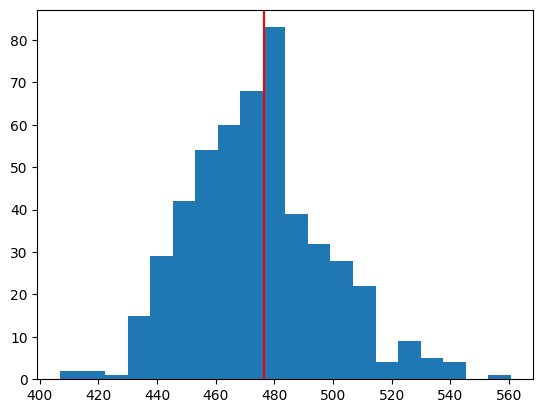

In [8]:
plt.hist(oneway.latest_means, bins=20)
plt.axvline(vanilla.mean(), c='red')

In [67]:
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
from oce_ecomm_abv_calculation.plots.vanilla_vs_bootstrap_se import (
    get_plot_statistics_from_experiment_results_file,
    get_plot_parameters,
    plot_one_bootstrap_versus_vanilla_se_plot, 
    plot_one_bootstrap_vanilla_se_ratio_plot
)

plot_statistics_olist_asp_df = (
    get_plot_statistics_from_experiment_results_file(
        vanilla_experiment_results_df=pd.read_parquet(
            "./data/expt_vanilla_olist-brazilian-ecommerce-customer-order-item-view_"
            "r-SellingPrice_consolidated.parquet"),
        bootstrap_experiment_results_df=pd.read_parquet(
            "./data/expt_oneway_olist-brazilian-ecommerce-customer-order-item-view_"
            "r-SellingPrice_consolidated.parquet"),
        normalize_se = False
    )
)

In [68]:
plot_statistics_olist_asp_df

,dataset_name,response_col,start_time,end_time,count,sample_standard_error,bootstrap_standard_error_mean,bootstrap_standard_error_stddev,bootstrap_standard_error_count,days_elapsed,prop_time_elapsed,bootstrap_standard_error_mean_ratio,bootstrap_standard_error_stddev_ratio
0,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2016-10-18,347,8.819456,9.348618,0.310579,50,44,0.060274,1.059999,0.035215
1,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2016-11-01,347,8.819456,9.378733,0.337728,60,58,0.079452,1.063414,0.038294
2,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2016-11-15,347,8.819456,9.357692,0.309011,50,72,0.098630,1.061028,0.035037
3,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2016-11-29,347,8.819456,9.386319,0.301584,50,86,0.117808,1.064274,0.034195
4,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-15,462,7.632756,8.282242,0.252006,50,133,0.182192,1.085092,0.033016
5,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,1064,5.132194,5.664778,0.182102,50,146,0.200000,1.103773,0.035482
6,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-02-15,2411,5.050244,5.229998,0.164286,50,164,0.224658,1.035593,0.032530
7,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-03-01,3237,4.164002,4.327312,0.126894,50,178,0.243836,1.039219,0.030474
8,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-03-15,4556,3.366333,3.477800,0.109698,50,192,0.263014,1.033112,0.032587
9,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-04-01,6212,2.870604,2.956380,0.101423,50,209,0.286301,1.029881,0.035332


In [107]:
df = (
    pd.read_parquet(
            "./data/expt_oneway_olist-brazilian-ecommerce-customer-order-item-view_"
            "r-SellingPrice_consolidated.parquet")
)
df[df['end_time'] == '2017-01-28']

,dataset_name,response_col,start_time,end_time,num_bootstrap_means,bootstrap_mean,bootstrap_means,bootstrap_standard_error,count
378,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,122.330356,"[124.5086606243706, 116.81449856733525, 124.88...",5.456250,1064
380,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,116.176055,"[118.43118766999093, 117.58315454545455, 127.8...",5.659213,1064
390,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,133.968202,"[127.4748201438849, 117.81085227272729, 113.20...",6.026474,1064
391,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,130.263008,"[126.96111538461538, 125.57977272727274, 129.3...",5.652696,1064
395,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,122.248075,"[128.97198915009042, 126.05282980866065, 120.4...",5.943971,1064
411,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,126.700239,"[126.40610294117647, 109.82715635738832, 126.2...",5.609601,1064
424,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,120.420223,"[122.56529032258067, 125.62882183908044, 124.7...",5.548959,1064
447,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,129.213122,"[121.36881882770871, 121.79066792097838, 131.1...",5.904563,1064
455,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,122.158788,"[109.81310947562096, 112.05916824196596, 119.7...",5.634119,1064
458,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,131.103057,"[124.0883752417795, 123.5413756097561, 119.952...",5.402000,1064


In [106]:
df = (
    pd.read_parquet(
            "./data/expt_twoway_olist-brazilian-ecommerce-customer-order-item-view_"
            "r-SellingPrice_12345.parquet")
)
df[df['end_time'] == '2017-01-28']

,dataset_name,response_col,start_time,end_time,num_bootstrap_means,bootstrap_mean,bootstrap_means,bootstrap_standard_error,count
0,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,121.353434,"[126.21232342007437, 135.36909255898365, 133.9...",10.443236,1064
1,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,110.963645,"[130.35223577235772, 115.65290354330709, 123.5...",10.902975,1064
2,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,107.429447,"[117.41153628652216, 123.12912361623616, 121.8...",10.233518,1064
3,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,136.640589,"[136.7904089219331, 123.98410358565738, 127.76...",11.039154,1064
4,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,114.503214,"[138.7714058956916, 114.68896253602304, 131.89...",10.078493,1064
5,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,131.076667,"[125.03790590405903, 130.16802143446, 107.2272...",10.693762,1064
7,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,116.356231,"[109.82090327737811, 105.81803587443946, 120.0...",10.588308,1064
8,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,145.137294,"[108.96032151690024, 120.42971792538673, 108.5...",10.491312,1064
9,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,125.171925,"[120.10345601436266, 120.64632923368023, 117.3...",10.820328,1064
10,olist_brazilian_ecommerce_customer_order_item_...,r_SellingPrice,2016-09-04,2017-01-28,500,145.069248,"[113.37669051878353, 110.80065762004175, 135.0...",11.351402,1064


In [91]:
df = (
    pd.read_parquet(
            "./data/expt_oneway_uci-online-retail-ii-customer-order-item-view_"
            "r-SellingPrice_consolidated.parquet")
)
df[df['end_time'] == datetime(2010, 2, 13)]

,dataset_name,response_col,start_time,end_time,num_bootstrap_means,bootstrap_mean,bootstrap_means,bootstrap_standard_error,count
138,uci_online_retail_ii_customer_order_item_view,r_SellingPrice,2009-12-01,2010-02-13,500,1.661033,"[1.6115238566225714, 1.6273364552994956, 1.352...",0.133960,870358
142,uci_online_retail_ii_customer_order_item_view,r_SellingPrice,2009-12-01,2010-02-13,500,1.659205,"[1.4223697303668192, 1.8443257950719054, 1.349...",0.135995,870358
178,uci_online_retail_ii_customer_order_item_view,r_SellingPrice,2009-12-01,2010-02-13,500,1.768472,"[1.7529643787841824, 1.4630464656905526, 1.551...",0.121742,870358
190,uci_online_retail_ii_customer_order_item_view,r_SellingPrice,2009-12-01,2010-02-13,500,1.794508,"[1.5604339072091695, 1.6585661883810459, 1.644...",0.122323,870358
196,uci_online_retail_ii_customer_order_item_view,r_SellingPrice,2009-12-01,2010-02-13,500,1.339144,"[1.5076925978622633, 1.7387344451526978, 1.696...",0.132680,870358
203,uci_online_retail_ii_customer_order_item_view,r_SellingPrice,2009-12-01,2010-02-13,500,1.692443,"[1.6150748264470096, 1.6532331377334775, 1.606...",0.127918,870358
205,uci_online_retail_ii_customer_order_item_view,r_SellingPrice,2009-12-01,2010-02-13,500,1.399802,"[1.5794901715668952, 1.8247893212923465, 1.557...",0.126784,870358
207,uci_online_retail_ii_customer_order_item_view,r_SellingPrice,2009-12-01,2010-02-13,500,1.570741,"[1.7527068503012002, 1.44326144282983, 1.68120...",0.124693,870358
210,uci_online_retail_ii_customer_order_item_view,r_SellingPrice,2009-12-01,2010-02-13,500,1.744647,"[1.8284128455728403, 1.5374409995932898, 1.728...",0.126220,870358
286,uci_online_retail_ii_customer_order_item_view,r_SellingPrice,2009-12-01,2010-02-13,500,1.617956,"[1.5172788298303586, 1.4020943436265259, 1.730...",0.125217,870358


In [101]:
df = (
    pd.read_parquet(
            "./data/expt_twoway_uci-online-retail-ii-customer-order-item-view_"
            "r-SellingPrice_12345.parquet")
)
df[df['end_time'] == datetime(2010, 2, 13)].shape

(16, 9)